# Previsão de Churn de Clientes Bancários

A base de dados utilizada neste projeto é o conjunto [Churn Modelling](https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling), disponível no **Kaggle**, que reúne informações de 10.000 clientes, incluindo variáveis como idade, salário estimado, e tipo de cartão de crédito, entre outras. Com esses dados, o projeto aplica técnicas de aprendizado de máquina para identificar padrões de comportamento e prever quais clientes têm maior probabilidade de deixar o banco.

## Fluxo do projeto
- **Pré-processamento dos dados**: Limpeza e transformação para garantir a qualidade dos dados.
- **Análise exploratória**: Identificação das variáveis mais relevantes e geração de insights.
- **Construção e avaliação de modelos**: Treinamento e validação de modelos de classificação para prever churn.
- **Implementação**: Aplicação do modelo para identificar clientes de risco e orientar ações estratégicas de retenção.

O principal objetivo é identificar clientes com maior probabilidade de churn, permitindo intervenções direcionadas, como campanhas de marketing personalizadas. 

Este modelo tem o potencial de ser uma ferramenta valiosa para otimizar estratégias de retenção, aumentar a fidelização e melhorar a experiência dos clientes no banco.


## Sobre os dados

| Nome da variável     | Descrição                                                       | Tipo de dado |
|----------------------|-----------------------------------------------------------------|--------------|
| CustomerId           | Identificador de usuário                                        | inteiro      |
| Surname              | Último nome do cliente                                          | string       |
| CreditScore          | Score de crédito do cliente                                     | inteiro      |
| Geography            | País de origem do cliente                                       | string       |
| Gender               | Gênero do cliente (Female, Male)                                | string       |
| Age                  | Idade do cliente                                                | inteiro      |
| Tenure               | Tempo, em anos, que o cliente é cliente do banco                | inteiro      |
| Balance              | Balanço da conta do cliente                                     | float        |
| NumOfProducts        | Número de produtos da empresa que o cliente está usando        | inteiro      |
| HasCrCard            | 1 se o cliente tem cartão de crédito com o banco, 0 se não      | inteiro      |
| IsActiveMember       | 1 se o cliente é um membro ativo do banco, 0 se não             | inteiro      |
| EstimatedSalary      | Estimativa de salário do cliente                                | float        |
| Exited               | Valor binário 1 se o cliente fechou a conta do banco ou 0 se não| inteiro      |


|Nome da variável|Descrição|Tipo de dado|
|-:|:-:|:-|
|CustomerId|Identificador de usuário|inteiro
|Surname|Último nome do cliente|string
|CreditScore|Score de crédito do cliente|inteiro
|Geography|País de origem do cliente|string
|Gender|Gênero do cliente (Female, Male)|string
|Age|Idade do cliente|inteiro
|Tenure|Tempo, em anos, que o cliente é cliente do banco|inteiro
|Balance|Balanço da conta do cliente|float
|NumOfProducts|Número de produtos da empresa que o cliente está usando|inteiro
|HasCrCard|1 se o cliente tem cartão de crédito com o banco, 0 se não|inteiro
|IsActiveMember|1 se o cliente é um membro ativo do banco, 0 se não|inteiro
|EstimatedSalary|Estimativa de salário do cliente|float
|Exited|Valor binário 1 se o cliente fechou a conta do banco ou 0 se não (churn)|inteiro

### Importando bibliotecas:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import *
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, recall_score, precision_score, accuracy_score

### Carregando dados:

In [2]:
df = pd.read_csv('Churn_Modelling.csv', index_col='RowNumber').reset_index(drop=True)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- #### Removendo Variáveis **CustomerId** e **Surname**, pois não possuem relevância para a previsão de churn

In [3]:
df = df.drop(['CustomerId', 'Surname'], axis=1)

- #### A base de dados não apresenta valores faltantes ou duplicados

In [4]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.duplicated().sum()

0

## Análise Univariada

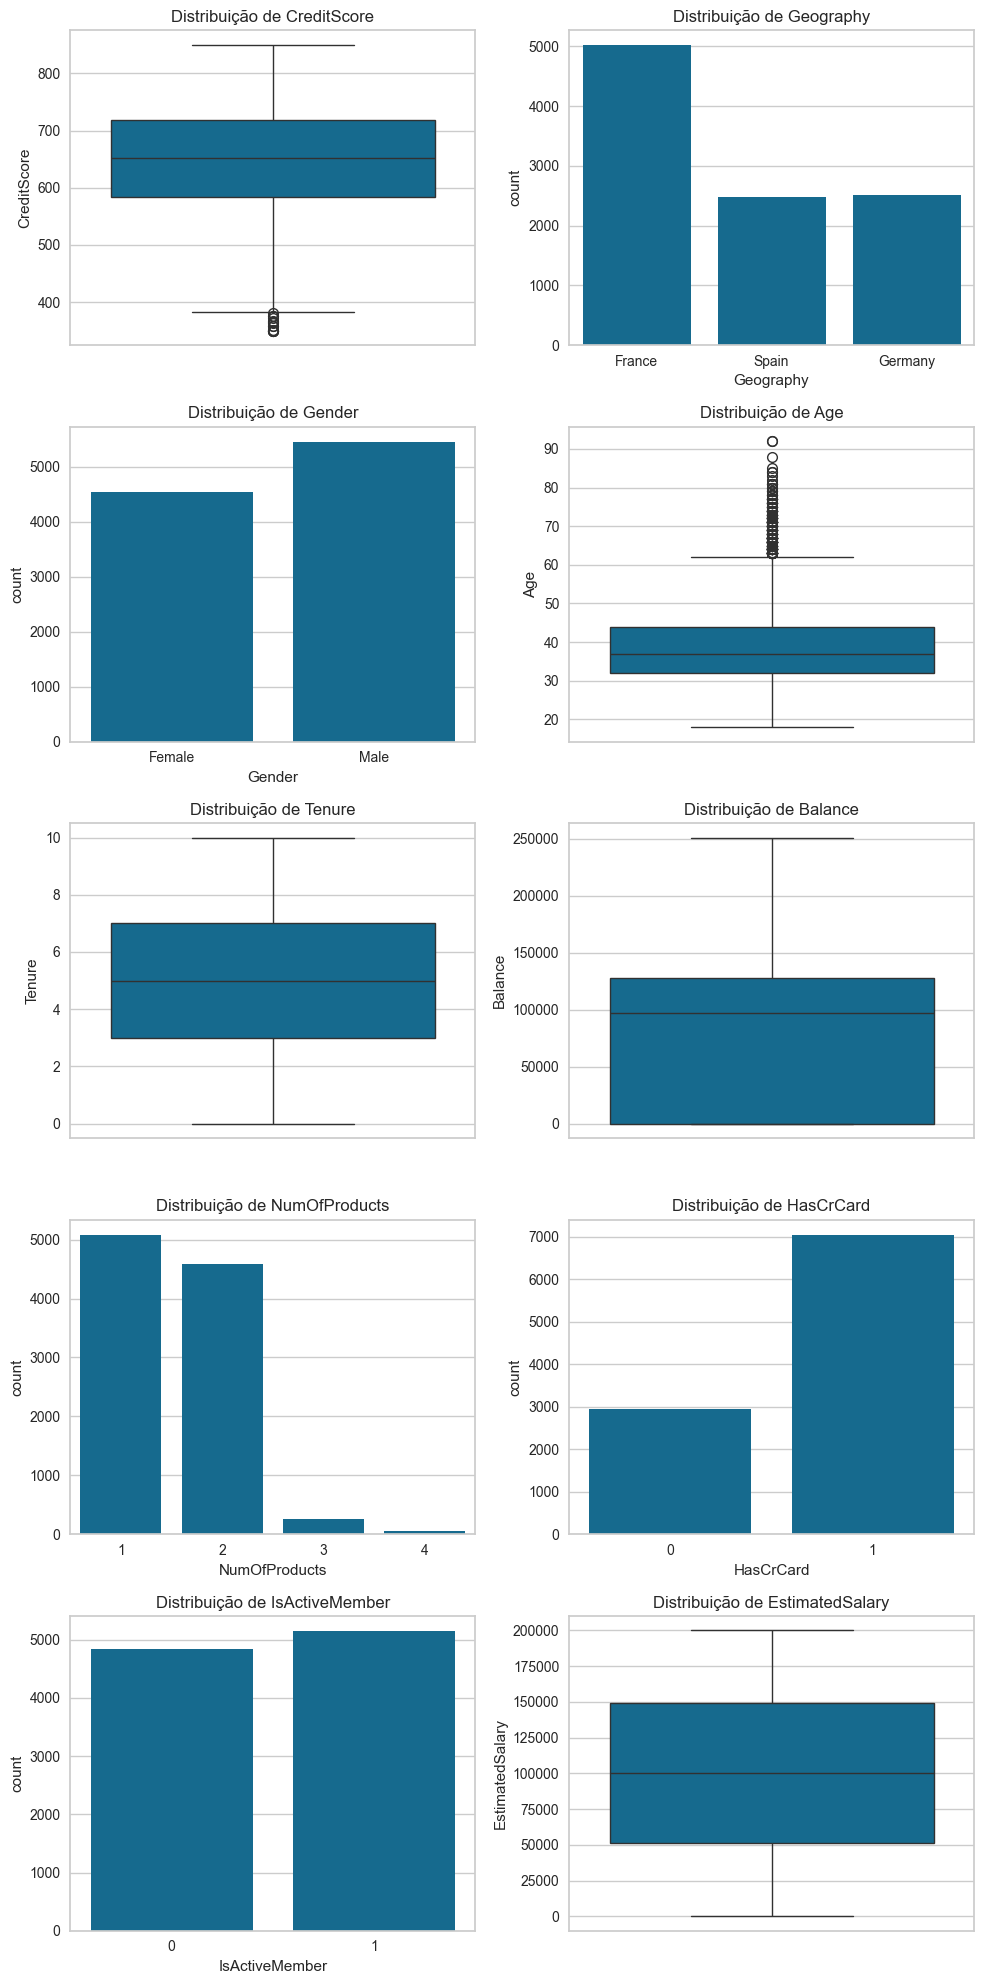

In [6]:
fig, axes = plt.subplots(5, 2, figsize=(10, 20))

sns.boxplot(df,
            y='CreditScore',
            ax=axes[0,0])
axes[0,0].set_title('Distribuição de CreditScore')


sns.countplot(df,
              x='Geography',
              ax=axes[0,1])
axes[0,1].set_title('Distribuição de Geography')


sns.countplot(df,
              x='Gender',
              ax=axes[1,0])
axes[1,0].set_title('Distribuição de Gender')


sns.boxplot(df,
            y='Age',
            ax=axes[1,1])
axes[1,1].set_title('Distribuição de Age')


sns.boxplot(df,
            y='Tenure',
            ax=axes[2,0])
axes[2,0].set_title('Distribuição de Tenure')


sns.boxplot(df,
            y='Balance',
            ax=axes[2,1])
axes[2,1].set_title('Distribuição de Balance')


sns.countplot(df,
              x='NumOfProducts',
              ax=axes[3,0])
axes[3,0].set_title('Distribuição de NumOfProducts')


sns.countplot(df,
              x='HasCrCard',
              ax=axes[3,1])
axes[3,1].set_title('Distribuição de HasCrCard')


sns.countplot(df,
              x='IsActiveMember',
              ax=axes[4,0])
axes[4,0].set_title('Distribuição de IsActiveMember')


sns.boxplot(df,
            y='EstimatedSalary',
            ax=axes[4,1])
axes[4,1].set_title('Distribuição de EstimatedSalary')


plt.tight_layout()
plt.show()

### Insights da Análise Univariada

1) As variáveis **CreditScore** e **Age** apresentam alguns outliers.
2) Metade dos clientes tem a França como país de origem.
3) A maioria dos clientes do banco possui um tempo de permanência entre 3 e 7 anos.
4) A minoria dos clientes utiliza 3 ou mais produtos do banco.
5) Mais da metade dos clientes possuem cartão de crédito.

## Análise Bivariada

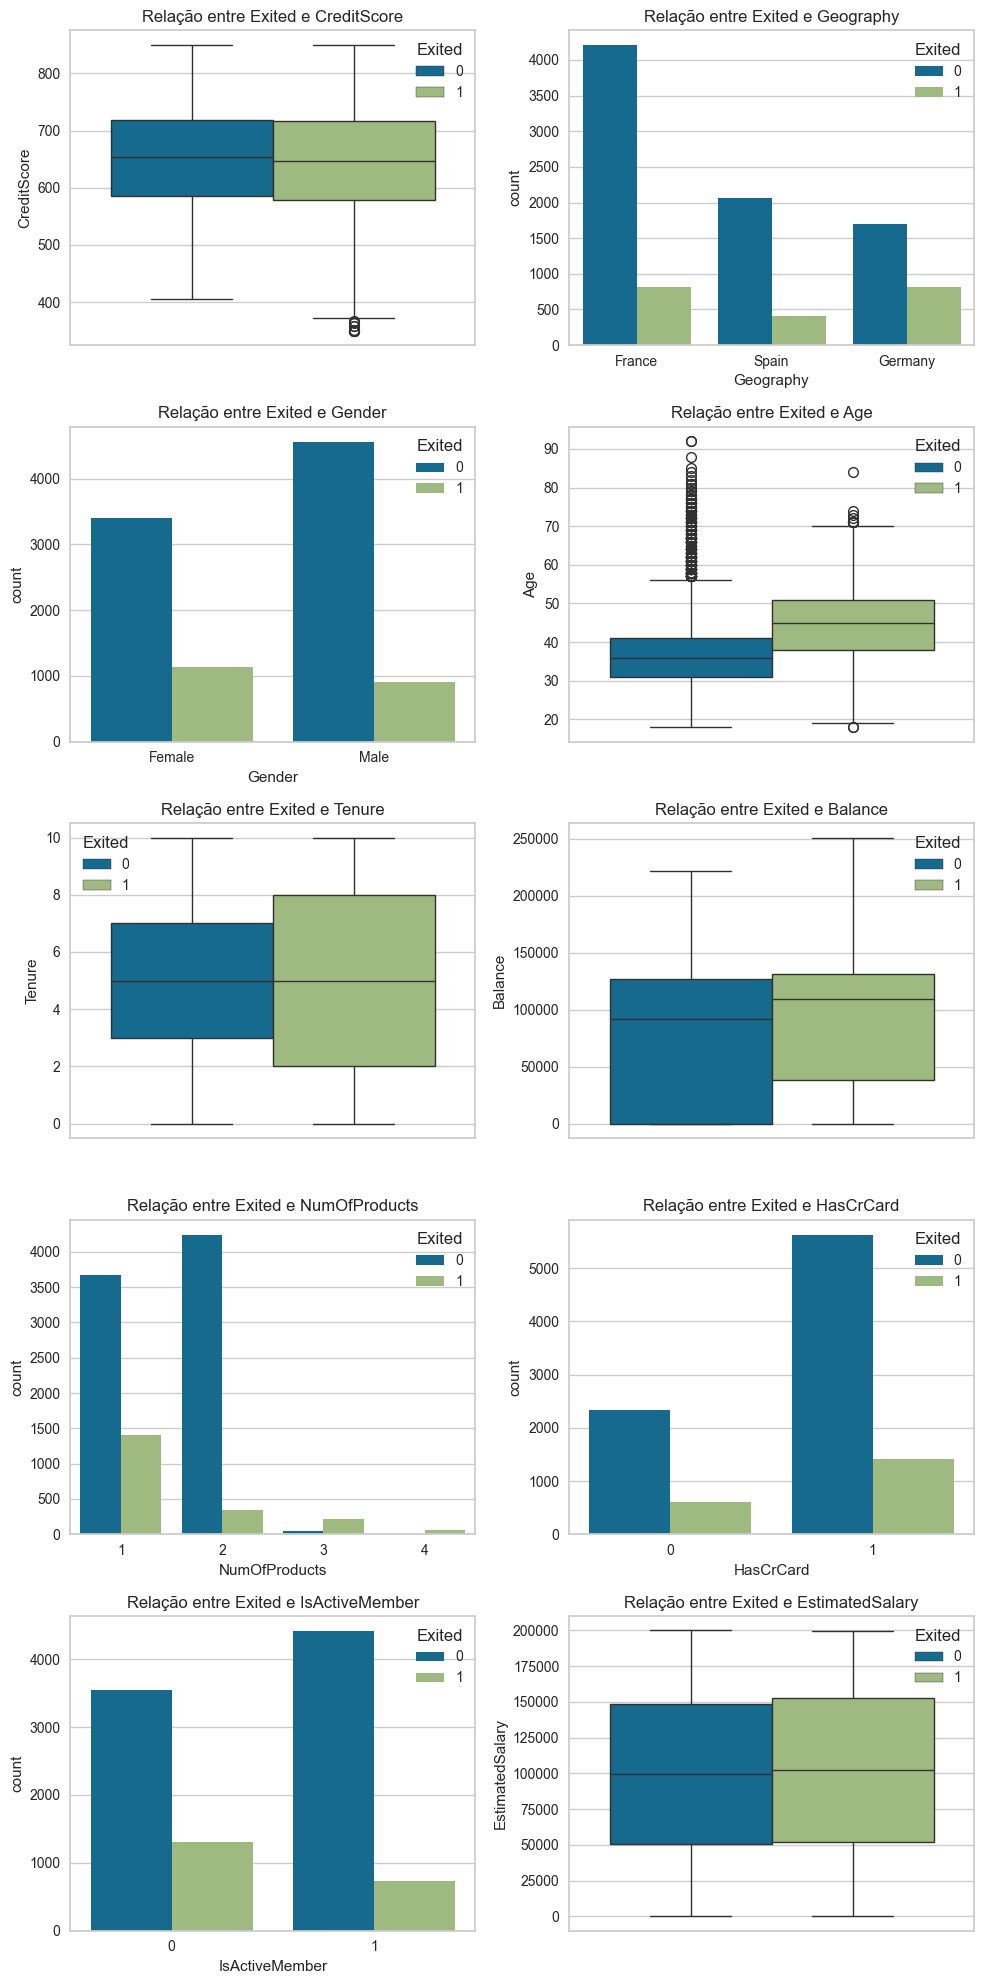

In [7]:
fig, axes = plt.subplots(5, 2, figsize=(10, 20))

sns.boxplot(df,
            y='CreditScore',
            hue='Exited',
            ax=axes[0,0])
axes[0,0].set_title('Relação entre Exited e CreditScore')


sns.countplot(df,
              x='Geography',
              hue='Exited',
              ax=axes[0,1])
axes[0,1].set_title('Relação entre Exited e Geography')


sns.countplot(df,
              x='Gender',
              hue='Exited',
              ax=axes[1,0])
axes[1,0].set_title('Relação entre Exited e Gender')


sns.boxplot(df,
            y='Age',
            hue='Exited',
            ax=axes[1,1])
axes[1,1].set_title('Relação entre Exited e Age')


sns.boxplot(df,
            y='Tenure',
            hue='Exited',
            ax=axes[2,0])
axes[2,0].set_title('Relação entre Exited e Tenure')


sns.boxplot(df,
            y='Balance',
            hue='Exited',
            ax=axes[2,1])
axes[2,1].set_title('Relação entre Exited e Balance')


sns.countplot(df,
              x='NumOfProducts',
              hue='Exited',
              ax=axes[3,0])
axes[3,0].set_title('Relação entre Exited e NumOfProducts')


sns.countplot(df,
              x='HasCrCard',
              hue='Exited',
              ax=axes[3,1])
axes[3,1].set_title('Relação entre Exited e HasCrCard')


sns.countplot(df,
              x='IsActiveMember',
              hue='Exited',
              ax=axes[4,0])
axes[4,0].set_title('Relação entre Exited e IsActiveMember')


sns.boxplot(df,
            y='EstimatedSalary',
            hue='Exited',
            ax=axes[4,1])
axes[4,1].set_title('Relação entre Exited e EstimatedSalary')


plt.tight_layout()
plt.show()

### Insights da Análise Bivariada

1) Metade dos clientes da Alemanha deixaram de ser clientes do banco.
2) Clientes do gênero feminino tem uma proporção de churn ligeiramente superior.
3) Clientes com idade superior a 35 anos tem maior chance de churn
4) Clientes considerados inativos tem uma probabilidade maior de churn.
5) Clientes com tempo de permanência menor que 3 anos e maior que 7 anos tem mais chances de churn.

## Modelagem

### Extraindo amostra para validação do modelo:

In [6]:
# Extraindo 5% dos dados para usar como validação:
val = df.sample(frac=.05, random_state=9)
X_val = df.iloc[val.index]
y_val = df.iloc[val.index].Exited

# Removendo dados de validação da base de treino/teste
data = df.drop(X_val.index)

In [7]:
# Iniciando Pycaret
churn_exp = setup(data,
                  fold=15, # validação cruzada para avaliar o desempenho do modelo de forma robusta.
                  normalize=True, # normaliza os dados para que todas as variáveis tenham escalas semelhantes.
                  fix_imbalance=True, # corrige o desbalanceamento de classes para melhorar a performance em dados desbalanceados.
                  remove_outliers=True, # remove valores extremos (outliers) que podem distorcer o modelo.
                  session_id=9,
                  target='Exited',
                 )

,Description,Value
0,Session id,9
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(9500, 11)"
4,Transformed data shape,"(13066, 13)"
5,Transformed train set shape,"(10216, 13)"
6,Transformed test set shape,"(2850, 13)"
7,Numeric features,8
8,Categorical features,2
9,Preprocess,True


### Objetivo:

Meu foco inicial é identificar o modelo com melhor **AUC** (**Área sob a Curva ROC**), pois essa métrica avalia a capacidade do modelo de distinguir entre clientes que farão churn e os que não farão, independentemente do limiar de decisão. A partir disso, ajustarei o modelo para priorizar o **Recall**, reduzindo os falsos negativos, já que minha prioridade é minimizar erros ao identificar clientes que farão churn. Não detectar esses casos pode resultar em perdas financeiras significativas.

Não me preocupo tanto com os falsos positivos, pois o impacto deles — como custos operacionais ou ações de marketing desnecessárias — é menor em comparação à perda de clientes reais. Além disso, meu objetivo é criar um modelo que supere abordagens básicas, como classificar todos os clientes como churn ou fazer previsões aleatórias, gerando valor ao economizar recursos e melhorar a retenção.

### Selecionando modelo:

- A função **compare_models()** compara métricas de diversos modelos, estou procurando pelo modelo com melhor "**AUC**".

In [8]:
best_model = compare_models(sort='AUC')
# plot_model(best_model, plot='confusion_matrix')

pred = predict_model(best_model, verbose=False)

y_true = pred['Exited']
y_pred = pred['prediction_label']

print(classification_report(y_true, y_pred))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8591,0.8615,0.5318,0.7049,0.6049,0.5213,0.5298,0.6953
lightgbm,Light Gradient Boosting Machine,0.8561,0.8557,0.5052,0.7055,0.5874,0.5033,0.5144,0.3367
ada,Ada Boost Classifier,0.8462,0.8447,0.5496,0.6439,0.5918,0.4979,0.5010,0.2813
rf,Random Forest Classifier,0.8573,0.8435,0.4926,0.7196,0.5836,0.5012,0.5151,0.4267
et,Extra Trees Classifier,0.8534,0.8390,0.4749,0.7106,0.5673,0.4835,0.4988,0.3273
qda,Quadratic Discriminant Analysis,0.6692,0.7793,0.7433,0.3580,0.4802,0.2826,0.3241,0.1287
lr,Logistic Regression,0.7135,0.7694,0.6849,0.3848,0.4927,0.3143,0.3398,0.8107
ridge,Ridge Classifier,0.7146,0.7691,0.6834,0.3857,0.4930,0.3151,0.3403,0.1307
lda,Linear Discriminant Analysis,0.7144,0.7691,0.6834,0.3856,0.4929,0.3149,0.3401,0.1327
knn,K Neighbors Classifier,0.7711,0.7646,0.5784,0.4513,0.5068,0.3608,0.3657,0.1860


              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2271
           1       0.71      0.52      0.60       579

    accuracy                           0.86      2850
   macro avg       0.80      0.73      0.76      2850
weighted avg       0.85      0.86      0.85      2850



- A função tune_model() realiza uma busca por hiperparâmetros com o objetivo de otimizar o desempenho do modelo. Neste projeto, a prioridade é maximizar o **Recall**, garantindo a melhor identificação de clientes em risco de churn.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7072,0.7360,0.6333,0.3701,0.4672,0.2840,0.3035
1,0.7252,0.7811,0.7222,0.4012,0.5159,0.3452,0.3743
2,0.7095,0.7846,0.6778,0.3789,0.4861,0.3054,0.3305
3,0.6734,0.7082,0.6044,0.3354,0.4314,0.2278,0.2472
4,0.7117,0.7605,0.6593,0.3822,0.4839,0.3030,0.3247
5,0.6953,0.8027,0.7444,0.3743,0.4981,0.3122,0.3502
6,0.6907,0.7346,0.6000,0.3484,0.4408,0.2473,0.2648
7,0.6637,0.7450,0.6778,0.3370,0.4502,0.2454,0.2765
8,0.7065,0.8137,0.7556,0.3864,0.5113,0.3316,0.3697


Fitting 15 folds for each of 50 candidates, totalling 750 fits


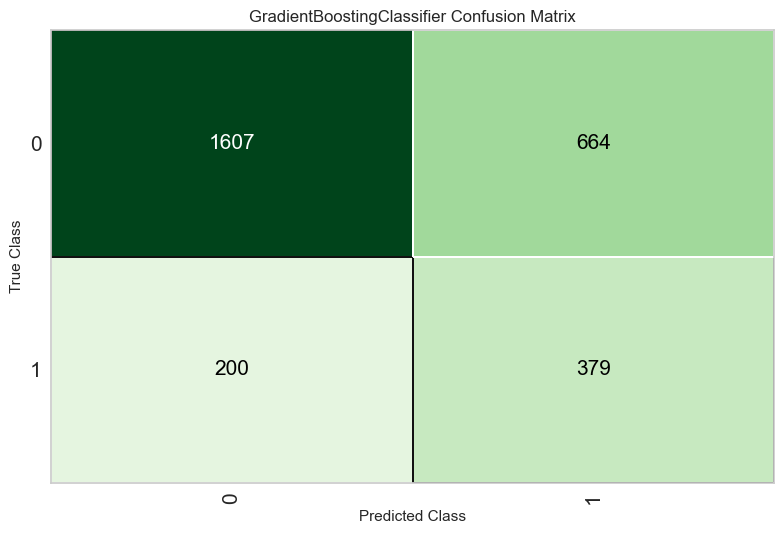

In [9]:
model_tuned = tune_model(best_model, n_iter=50, optimize='Recall')
plot_model(model_tuned, plot='confusion_matrix')

- Para melhorar o **Recall** da classe 0, optei por ajustar o limiar de decisão do modelo. Ao diminuir o limiar, o objetivo é identificar mais clientes que não farão churn, aumentando a sensibilidade para essa classe, mesmo que isso possa impactar levemente outras métricas como a precisão.

              precision    recall  f1-score   support

           0       0.90      0.63      0.74      2271
           1       0.34      0.73      0.46       579

    accuracy                           0.65      2850
   macro avg       0.62      0.68      0.60      2850
weighted avg       0.79      0.65      0.69      2850



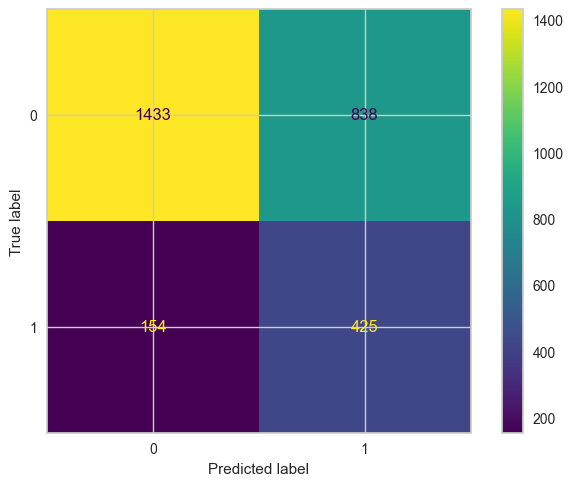

In [22]:
# Diminuindo limiar de decisão 
threshold = 0.478 # Padrão é 0.5

pred = predict_model(model_tuned, probability_threshold=threshold, verbose=False)

y_true = pred['Exited']
y_pred = pred['prediction_label']

print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

### Comparação do modelo real com um modelo base (que classifica todos como churn) e com previsões aleatórias:

In [14]:
# Modelo Base: Considerar todos como churn
y_pred_base = [1] * len(y_true)
print("        AUC do modelo base:", roc_auc_score(y_true, y_pred_base))
print("     Recall do modelo base:", recall_score(y_true, y_pred_base))
print("      Prec. do modelo base:", precision_score(y_true, y_pred_base))
print("        Acc do modelo base:", accuracy_score(y_true, y_pred_base), end='\n\n')

# Gerando previsões aleatórias (com a mesma distribuição de classes)
y_pred_random = np.random.choice([0, 1], size=len(y_true), p=[1 - np.mean(y_true), np.mean(y_true)])

# Modelo Aleatório:
print("   AUC do modelo aleatório:", roc_auc_score(y_true, y_pred_random))
print("Recall do modelo aleatório:", recall_score(y_true, y_pred_random))
print(" Prec. do modelo aleatório:", precision_score(y_true, y_pred_random))
print("   Acc do modelo aleatório:", accuracy_score(y_true, y_pred_random), end='\n\n')

# Modelo Real:
print("        AUC do modelo real:", roc_auc_score(y_true, y_pred))
print("     Recall do modelo real:", recall_score(y_true, y_pred))
print("      Prec. do modelo real:", precision_score(y_true, y_pred))
print("        Acc do modelo real:", accuracy_score(y_true, y_pred))

        AUC do modelo base: 0.5
     Recall do modelo base: 1.0
      Prec. do modelo base: 0.2031578947368421
        Acc do modelo base: 0.2031578947368421

   AUC do modelo aleatório: 0.5143222838994942
Recall do modelo aleatório: 0.22107081174438686
 Prec. do modelo aleatório: 0.22654867256637168
   Acc do modelo aleatório: 0.6884210526315789

        AUC do modelo real: 0.6846816015404867
     Recall do modelo real: 0.7150259067357513
      Prec. do modelo real: 0.34528773978315264
        Acc do modelo real: 0.6666666666666666


### Avaliando o desempenho do modelo na base de validação e comparando seus resultados com os modelos base e aleatório:

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6860,0.7678,0.7925,0.3836,0.5169,0.3237,0.3706


              precision    recall  f1-score   support

           0       0.92      0.66      0.77       394
           1       0.38      0.79      0.52       106

    accuracy                           0.69       500
   macro avg       0.65      0.72      0.64       500
weighted avg       0.81      0.69      0.71       500



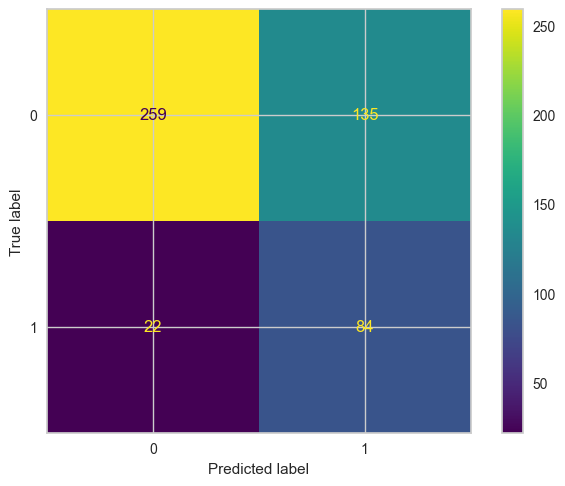

In [23]:
val_pred = predict_model(model_tuned, data=X_val, probability_threshold=threshold)['prediction_label']

print(classification_report(y_val, val_pred))

cm = confusion_matrix(y_val, val_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [24]:
# Modelo Base: Considerar todos como churn
y_val_pred_base = [1] * len(y_val)
print("        AUC do modelo base:", roc_auc_score(y_val, y_val_pred_base))
print("     Recall do modelo base:", recall_score(y_val, y_val_pred_base))
print("      Prec. do modelo base:", precision_score(y_val, y_val_pred_base))
print("        Acc do modelo base:", accuracy_score(y_val, y_val_pred_base), end='\n\n')

# Gerando previsões aleatórias (com a mesma distribuição de classes)
y_val_pred_random = np.random.choice([0, 1], size=len(y_val), p=[1 - np.mean(y_val), np.mean(y_val)])

# Modelo Aleatório:
print("   AUC do modelo aleatório:", roc_auc_score(y_val, y_val_pred_random))
print("Recall do modelo aleatório:", recall_score(y_val, y_val_pred_random))
print(" Prec. do modelo aleatório:", precision_score(y_val, y_val_pred_random))
print("   Acc do modelo aleatório:", accuracy_score(y_val, y_val_pred_random), end='\n\n')

# Modelo Real:
print("        AUC do modelo real:", roc_auc_score(y_val, val_pred))
print("     Recall do modelo real:", recall_score(y_val, val_pred))
print("      Prec. do modelo real:", precision_score(y_val, val_pred))
print("        Acc do modelo real:", accuracy_score(y_val, val_pred))

        AUC do modelo base: 0.5
     Recall do modelo base: 1.0
      Prec. do modelo base: 0.212
        Acc do modelo base: 0.212

   AUC do modelo aleatório: 0.5129537400632124
Recall do modelo aleatório: 0.22641509433962265
 Prec. do modelo aleatório: 0.23300970873786409
   Acc do modelo aleatório: 0.678

        AUC do modelo real: 0.724906618140025
     Recall do modelo real: 0.7924528301886793
      Prec. do modelo real: 0.3835616438356164
        Acc do modelo real: 0.686


## Salvando modelo:

In [25]:
save_model(model_tuned, 'gbc_churn_0125');

Transformation Pipeline and Model Successfully Saved


In [26]:
gbc = load_model('gbc_churn_0125')

Transformation Pipeline and Model Successfully Loaded


In [27]:
gbc.named_steps

{'numerical_imputer': TransformerWrapper(exclude=None,
                    include=['CreditScore', 'Age', 'Tenure', 'Balance',
                             'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                             'EstimatedSalary'],
                    transformer=SimpleImputer(add_indicator=False, copy=True,
                                              fill_value=None,
                                              keep_empty_features=False,
                                              missing_values=nan,
                                              strategy='mean')),
 'categorical_imputer': TransformerWrapper(exclude=None, include=['Geography', 'Gender'],
                    transformer=SimpleImputer(add_indicator=False, copy=True,
                                              fill_value=None,
                                              keep_empty_features=False,
                                              missing_values=nan,
                                

# Conclusão:

Neste projeto, o objetivo inicial foi desenvolver um modelo capaz de prever o churn de clientes de forma eficaz, priorizando a minimização de falsos negativos. Após treinar, ajustar e avaliar o modelo, conseguimos alcançar resultados satisfatórios, com um recall elevado para a classe de churn, que foi o foco principal, indicando que o modelo é eficaz em identificar clientes em risco de desistir.

## Recomendações:

1) **Melhorias no modelo**: Uma possível melhoria seria explorar a aplicação de técnicas adicionais para lidar com outliers ou testar modelos diferentes (como XGBoost ou redes neurais) para comparar os resultados e ver se conseguimos um aumento no desempenho.
2) **Monitoramento contínuo**: Uma vez que o modelo esteja implementado, recomenda-se monitorar seu desempenho periodicamente, especialmente em cenários onde o comportamento dos clientes pode mudar ao longo do tempo.
3) **Ajuste do limiar**: Continuar ajustando o limiar de decisão de acordo com os resultados e métricas de negócio, equilibrando o recall com a precisão para obter o melhor trade-off.

Em resumo, o modelo desenvolvido atendeu ao objetivo inicial de prever o churn de maneira eficiente, e com as recomendações acima, podemos aprimorar ainda mais sua performance e aplicabilidade no ambiente real.